<a href="https://colab.research.google.com/github/tbeucler/2022_ML_EES/blob/main/Labs/S2_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1: Comparing Different Types of Support Vector Machines for Classification**

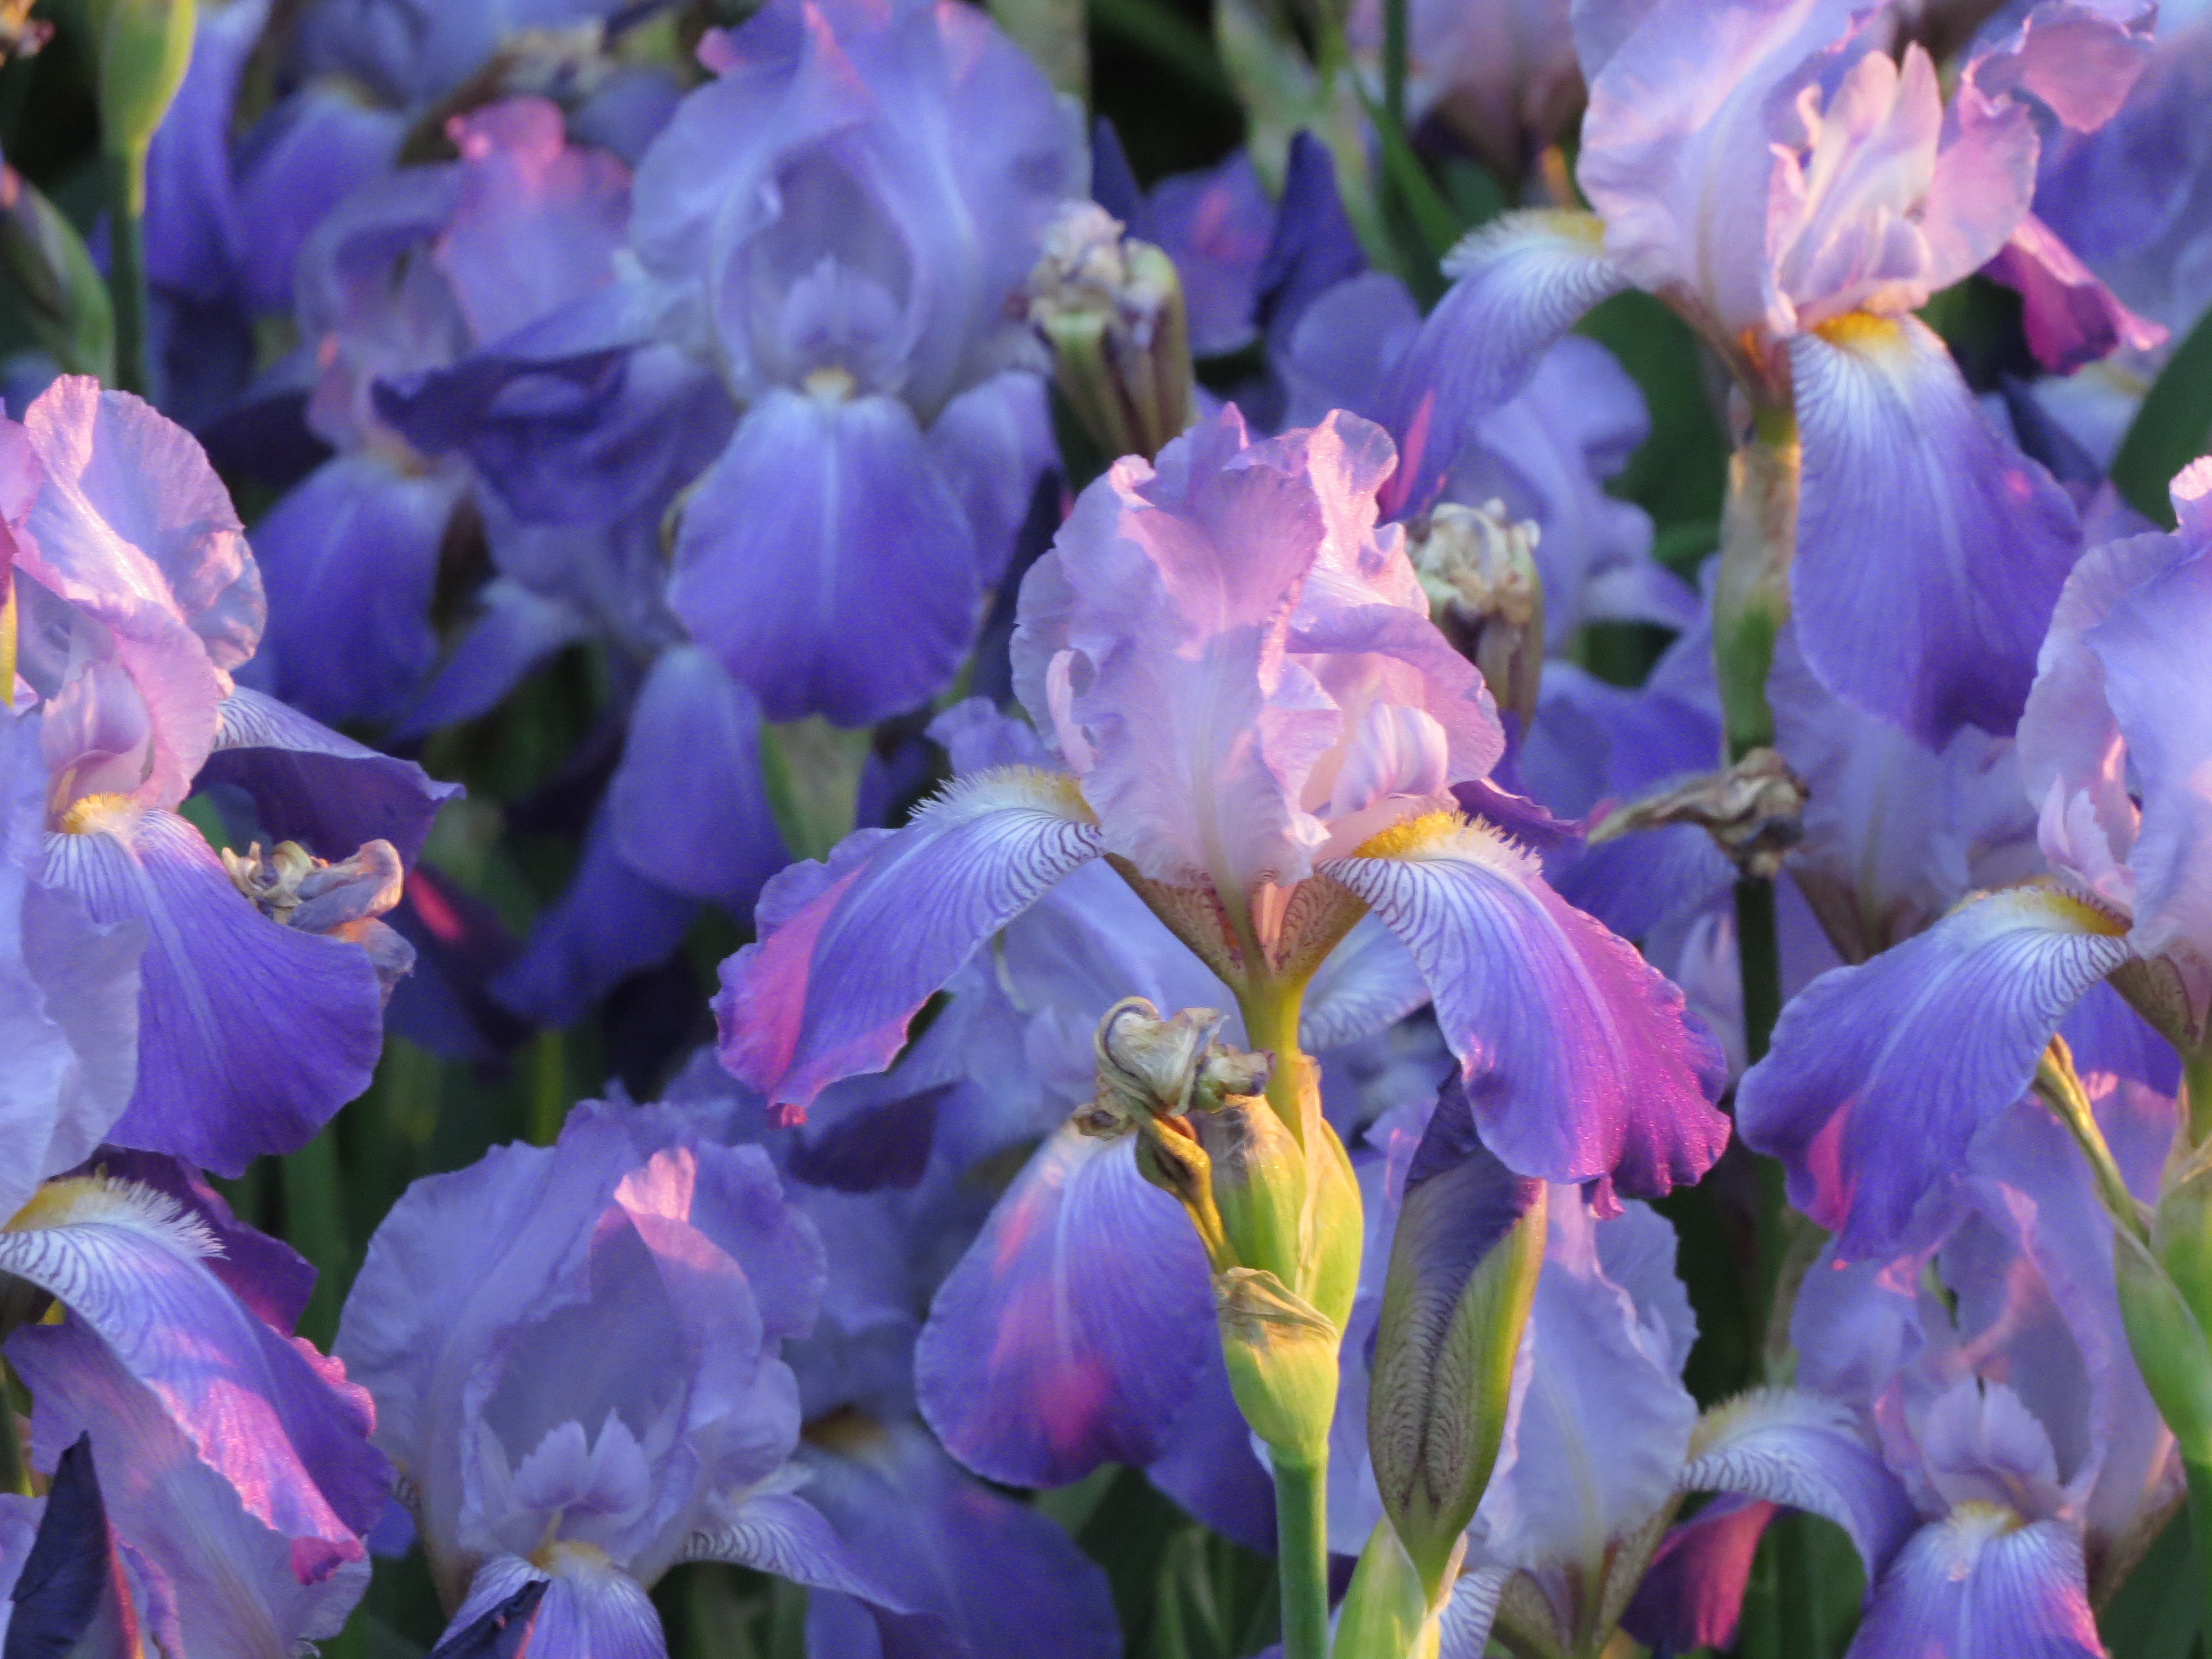

**Caption**: Iris flowers in the evening light. Are they Irises Setosa or Irises Versicolor?

**Source**: Photo by <a href="https://unsplash.com/@cbrin?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Christina Brinza</a> on <a href="https://unsplash.com/s/photos/iris?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

**Goal**: Building similar models based on different types of Support Vector Machines (SVMs) to classify linearly separable classes, here [*Iris Setosa*](https://en.wikipedia.org/wiki/Iris_setosa) and [*Iris Versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor) from the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

First, let's load the Iris dataset! 💐

In [1]:
from sklearn import datasets # Import datasets from scikit-learn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = datasets.load_iris() # Load the Iris dataset specifically
X = iris["data"][:, (2, 3)]  # Features = petal length, petal width
y = iris["target"] # Target = Iris species

In [4]:
# The iris dataset contains information of different types of flowers.
# Here we want to choose two flowers: setosa and versicolor

setosa_or_versicolor = (y == 0) | (y == 1) # Indices of Irises setosa/versicolor
X = X[setosa_or_versicolor] # Only keep Irises setosa/versicolor in features
y = y[setosa_or_versicolor] # Only keep Irises setosa/versicolor in target

Now we have our pre-processed dataset 💐:

Our features are (petal length, petal width) in `X`.

Our target is (Iris species) in `y`.

In [ ]:
# (Optional) Expore X and y to familiarize yourself 
# with the pre-processed dataset
# A couple of things you can try is to look the size of the dataset you just loaded.
# (e.g., X.shape, y.shape) 


**Q1) Train a Linear Support Vector Classification model on the pre-processed dataset**

Hint: The documentation for `LinearSVC` is [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [ ]:
# Import the LinearSVC class from the scikit-learn `svm` library
from sklearn.___ import ___________

In [ ]:
# Fit a LinearSVC object on the Iris dataset
# (1) Initiate a LinearSVC object
______ = ________
# (2) Use the LinearSVC object to fit the dataset you just created. Use .fit() for this task.
______.___(__,__)

**Q2) Plot the decision boundary of this classifier**

Hint: According to the [documentation](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py), given a SVC object `svc`:

*    Weights: `W = svc.coef_[0]`, and 

*    Intercept: `I = svc.intercept_`

the decision boundary is the line:

$y_{boundary} = -\frac{W\left[0\right] x + I\left[0\right]}{W\left[1\right]}$

⚠ If you normalized your inputs before feeding it to the SVM in the previous question (e.g., via the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)), the equation above is only valid in "normalized" coordinates.

In [ ]:
# Use the first part of the hint to get the weights of the fitted SVC object
W = ____._____
# Use the second part of the hint to get the intercept of the fitted SVC object
I = ____._____

Now show the decision boundary that you just got in a scatter plot. Can it cleanly separate different flowers?

Hint: (1) We will use `plt.scatter()` to plot the flower data. Check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for details.
(2) We will need to initiate a `X` array to plot the decision boundary. There are many ways to create such an array, but let's use `np.linspace()` for now. [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [ ]:
# On the same figure: Scatter the features X and plot the decision boundary 
# Don't forget to label the axes and add a legend to your figure
# Initiate a figure using plt.subplots
___,ax = plt.subplots(__,___)

# Now plot all feature Xs in a scatter plot. Use these settings:
# (s = 80, color='r', edgecolor='k', linewidths=1.5) 
# X, y indices of the inputs can be accessed like this X[:,0] [X indices]; X[:,1] [Y indices]
ax.________(______,________,s=___,color=___,edgecolor=___,linewidths=___)

# Decision boundary: yboundary = - (W[0]*x+I[0])/W[1]
# Initiate a 1D array X with np.linspace()
x = np.linspace(_____)
# Calculate yboundary
yboundary = ___________
plt.plot(___,____,c='r',lw=2)

ax.set_xlabel("Pedal length",fontdict={'size':13})
ax.set_ylabel("Pedal width",fontdict={'size':13})
ax.set_title('Iris dataset')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2,ls='--',lw=1)
#[x.set_linewidth(2) for x in ax.spines.values()]
plt.show()


**Q3) Train a `SVC` and a `SGDClassifier` for the same task and compare these two models to the `LinearSVC`. Use `kernel = 'Linear'` when instantiating the SVC!**

Hint: Here is the documentation for the [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class and the [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) class. 

In [ ]:
# Import SVC and SGDClassifier
from sklearn.___ import _____ #SVC
from sklearn.__________ import ______________ #SGDClassifier

In [12]:
# Fit the `SVC` and the `SGDClassifier` to the pre-processed dataset
# Instantiate 'SVC', use kernel='linear'
______ = SVC(_____________)
# Instantiate 'SGDClassifier'
______ = __________()

# Fit models with data
______.____(_,_) # SVC
______.____(_,_)

In [ ]:
# Plot all three decision boundaries on the same labeled figure
#########################################################################
# Same as what you did to get the first figure
___,___ = ______.____________(____,____)
ax.scatter(________________________)

# Decision boundary: np.dot(W,x)+b = 0
_ = ________(_______)
__._____(_,_________,c='r',lw=2,label='LinearSVC')
#########################################################################
# Now add the decision boundary for 'SVC'
__._____(_,______________________,c='k',lw=2,label='SVC')
#########################################################################
# Now add the decision boundary for 'SGDClassifier'
__._____(_,______________________,c='b',lw=2,label='SGDClas.')
#########################################################################
# Same as the first figure again
ax.legend()
ax.set_xlabel("Pedal length",fontdict={'size':13})
ax.set_ylabel("Pedal width",fontdict={'size':13})
ax.set_title('Iris dataset')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2,ls='--',lw=1)
plt.show()

**Q4) Create more regularized versions of each model and compare these new models to the previous ones**

Hint: Vary the hyperparameter `C` for the `LinearSVC` and `SVC` models, and vary the hyperparameter `alpha` for the `SGDClassifier` **model**. Consult the documentation to know whether to increase or decrease the regularization parameters.

In [15]:
# Fit more regularized versions of the `LinearSVC` model
irisSVC_r = LinearSVC(C=_____).fit(X,y)

In [16]:
# Fit more regularized versions of the `SVC` model
irisSVC2_r = SVC(C=_____,______='_____').fit(X,y)

In [17]:
# Fit more regularized versions of the `SGDClassifier` model
irisSGDc_r = SGDClassifier(alpha=_________).fit(X,y)

In [ ]:
# Compare the new decision boundaries to the old ones
# Plot all three decision boundaries on the same labeled figure
#########################################################################
# Same as what you did to get the second figure
___,___ = ______.____________(____,____)
ax.scatter(________________________)

# Decision boundary: np.dot(W,x)+b = 0
_ = ________(_______)
__._____(_,_________,c='r',lw=2,label='LinearSVC')
__._____(_,______________________,c='k',lw=2,label='SVC')
__._____(_,______________________,c='b',lw=2,label='SGDClas.')
#########################################################################
# Now add the decision boundaries for the regularized models
# Regularized LinearSVC model
# Find the weights and intercept
Wlsvc_r,Ilsvc_r = _____________,_____________
ax.plot(x,_____________________________,c='r',lw=2,ls='--',label='LinearSVC_r')
# Regularized SVC model
# Find the weights and intercept
Wsvc_r,Isvc_r = _____________,_____________
ax.plot(x,_____________________________,c='k',lw=2,ls='--',label='SVC_r')
# Regularized SGDClassifier model
# Find the weights and intercept
Wsgdc_r,Isgdc_r = _____________,_____________
ax.plot(x,_____________________________,c='b',lw=2,ls='--',label='SGDClas._r')
#########################################################################
# Same as what you did to get the second figure
ax.legend()
ax.set_xlabel("Pedal length",fontdict={'size':13})
ax.set_ylabel("Pedal width",fontdict={'size':13})
ax.set_title('Iris dataset')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2,ls='--',lw=1)
plt.show()

How does regularization affect the decision boundary in this simple case?

# Bonus Exercise 1: Training a SVM Regressor on the California Housing Dataset

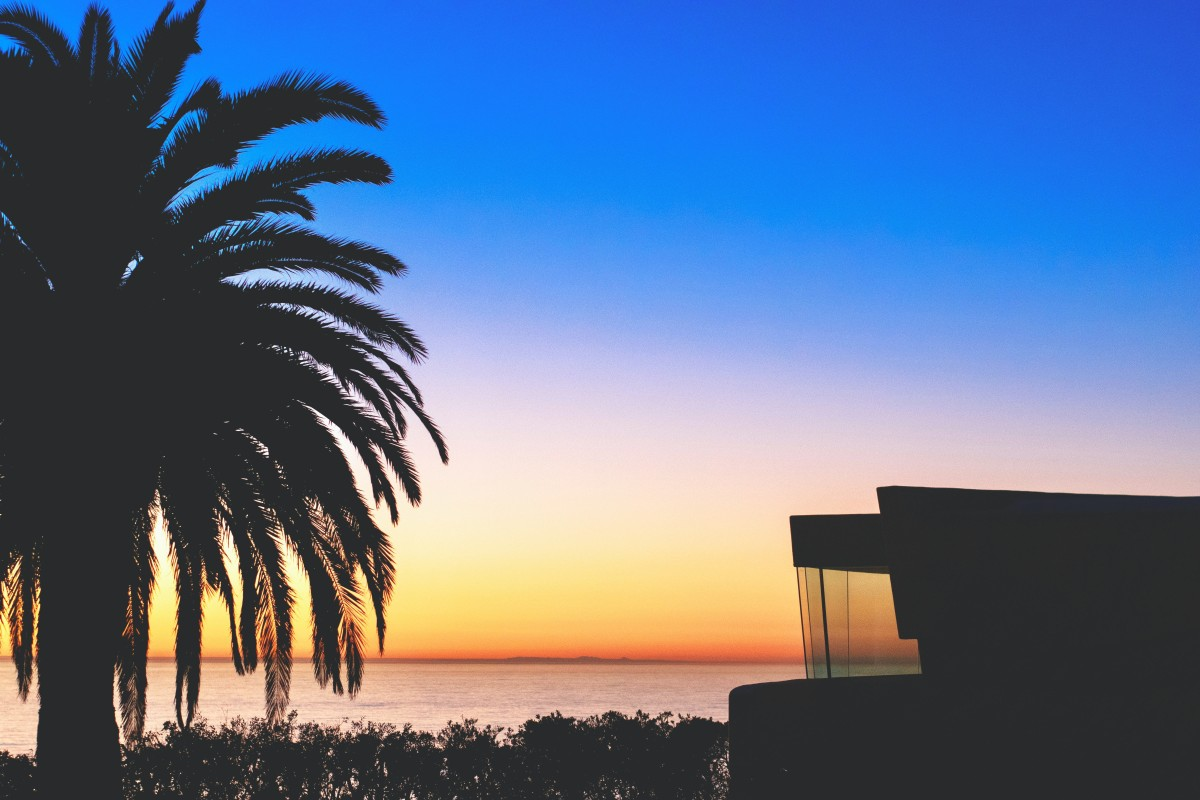

**Can we use SVMs to predict the price of a house in California** (in 1990) **based on its characteristics** (longitude, latitude, total_rooms, etc.)?

The dataset was originally used in [Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." *Statistics & Probability Letters* 33.3 (1997): 291-297.](https://www.sciencedirect.com/science/article/pii/S016771529600140X)

Let's first load the dataset using Scikit-Learn's `fetch_california_housing()` function:

In [ ]:
from sklearn.datasets import fetch_california_housing # Import function

In [ ]:
housing = fetch_california_housing() # Fetch dataset
X = housing["data"] # Features
y = housing["target"] # Targets

In [ ]:
# Don't hesitate to do some preliminary data analysis here

Let's split the data into a training set and a test set:

In [ ]:
from sklearn.model_selection import train_test_split # Import function
# from scikit-learn

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

**Q1) Normalize the features `X` before training the regressor**

Hint: You may use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to normalize `X` using its [z-score](https://en.wikipedia.org/wiki/Standard_score).

In [ ]:
# Define the normalization/scaler

In [ ]:
# Normalize the features `X`

**Q2) Start by training a simple Linear Support Vector Regression and assess its performance on the training and test sets**

Hint 1: [Here's the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html) for `scikit-learn`'s `LinearSVR`

Hint 2: You may assess the regressor's performance using the any [scikit-learn regression metric](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) you find interpretable. 

In [ ]:
# Train a simple linear SVR

In [ ]:
# Assess its performance on the training and test sets

**Q3) How large is the model error in $?**

Hint: The unit of `y` in the dataset is $10,000.

In [ ]:
# Estimate the approximate model error in units 10,000$

**Q4) Try to beat your linear model using more complex SVM regressors.**

Hint 1: The performance of a model should be assessed using the test set.

Hint 2: Géron's model uses a [`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) for which the hyperparameters `gamma` and `C` were optimized using a [Randomized Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), and gets the root mean-squared error down to approximately 6,000 dollars on the test dataset. 

In [ ]:
# Experiment here

In [ ]:
# Have fun

In [ ]:
# But don't spend too too much time on it as we have two more exercises
# to go through before we get to the wildfire dataset